클러스터링1에서는 주석을 달아놓은것과 같이 가져온 데이터를 읽어서 어떤 데이터인지 분석하는 과정을 진행하였습니다.

In [199]:
# seaborn 라이브러리 설치
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [200]:
# matplotlib.pyplot과 pandas 라이브러리를 임포트
import matplotlib.pyplot as plt
import pandas as pd


In [201]:
# "wifi.csv" 파일을 읽어서 데이터프레임에 저장
df = pd.read_csv("./wifi.csv")

# 데이터프레임의 첫 5개 행 출력
df.head()


,cname,line,name,dae,plat,count
0,SKT,1,다대포해수욕장,6,6,12
1,SKT,1,다대포항,4,6,10
2,SKT,1,낫개,2,4,6
3,SKT,1,신장림,2,6,8
4,SKT,1,장림,3,6,9


Get information about the dataframe

In [202]:
# 데이터프레임의 기본 정보 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cname   336 non-null    object
 1   line    336 non-null    int64 
 2   name    336 non-null    object
 3   dae     336 non-null    int64 
 4   plat    336 non-null    int64 
 5   count   336 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 15.9+ KB


Double-check for null values, by calling isnull() and verifying the sum being 0

In [203]:
# 각 열의 결측치(null 값) 개수 출력
df.isnull().sum()


cname    0
line     0
name     0
dae      0
plat     0
count    0
dtype: int64

Look at the general values of the data. Note that popularity can be '0' - and there are many rows with that value

In [204]:
# 데이터프레임의 기술 통계 정보 출력
df.describe()


,line,dae,plat,count
count,336.000000,336.000000,336.000000,336.000000
mean,2.062500,1.979167,3.514881,5.494048
std,0.995044,0.865343,0.955621,1.382177
min,1.000000,0.000000,1.000000,2.000000
25%,1.000000,2.000000,3.000000,5.000000
50%,2.000000,2.000000,4.000000,6.000000
75%,3.000000,2.000000,4.000000,6.000000
max,4.000000,8.000000,6.000000,12.000000


Text(0.5, 1.0, 'count')

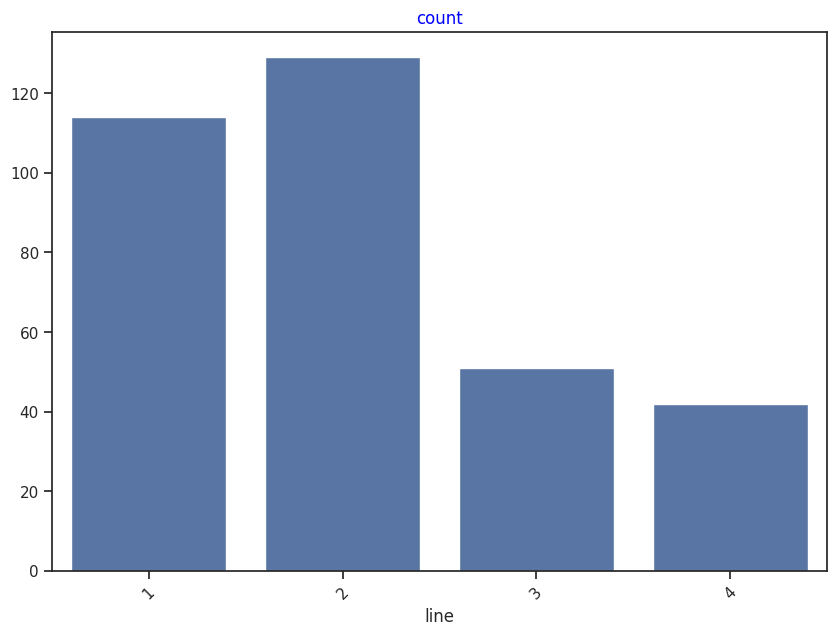

In [205]:
# seaborn 라이브러리 임포트
import seaborn as sns

# 'line' 열의 값의 빈도수 계산
top = df['line'].value_counts()

# 그래프 크기 설정
plt.figure(figsize=(10,7))

# 상위 5개의 값에 대한 막대 그래프 그리기
sns.barplot(x=top[:5].index, y=top[:5].values)

# x축 라벨 회전 및 제목 설정
plt.xticks(rotation=45)
plt.title('count', color='blue')


Text(0.5, 1.0, 'count')

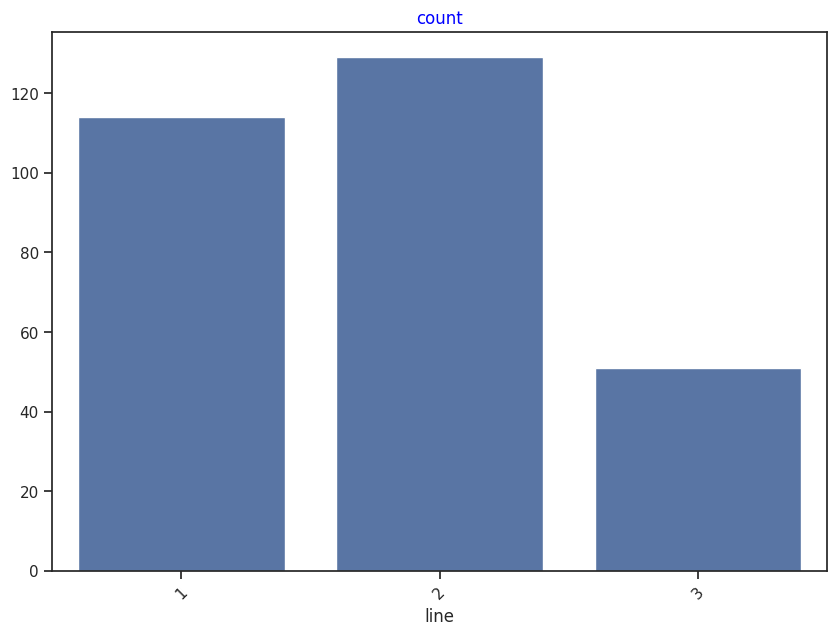

In [206]:
# 'line' 열에서 '4'을 제외한 데이터만 선택
df = df[df['line'] != 4]

# 'line' 열의 빈도수 계산
top = df['line'].value_counts()

# 바 차트 그리기
plt.figure(figsize=(10,7))
sns.barplot(x=top.index, y=top.values)

# x축 라벨 회전 및 제목 설정
plt.xticks(rotation=45)
plt.title('count', color='blue')


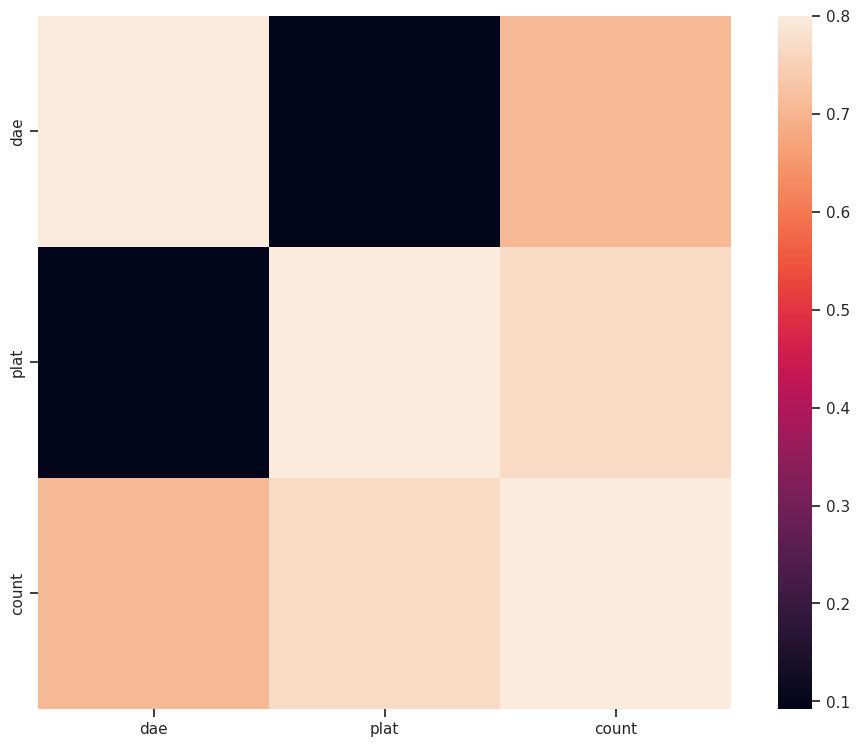

In [207]:

# 데이터프레임의 4번째 열부터 끝까지 선택하여 새로운 데이터프레임 생성
df_modified = df.iloc[:, 3:]

# 데이터프레임의 상관 행렬 계산
corrmat = df_modified.corr()

# 그래프의 크기 설정 및 서브플롯 생성
f, ax = plt.subplots(figsize=(12, 9))

# 상관 행렬의 heatmap 그리기
sns.heatmap(corrmat, vmax=.8, square=True)


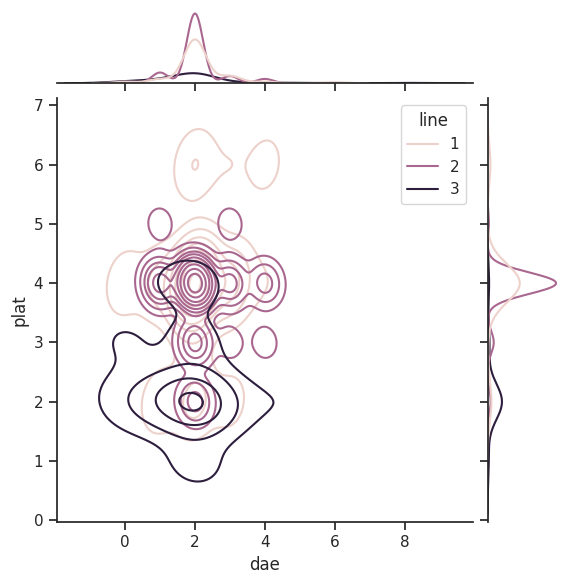

In [208]:
# seaborn 라이브러리 임포트 및 테마 설정
import seaborn as sns

# seaborn의 기본 테마 설정
sns.set_theme(style="ticks")

# jointplot 그리기
g = sns.jointplot(
    data=df,             # 사용할 데이터프레임
    x="dae",             # x축에 사용할 열 이름
    y="plat",            # y축에 사용할 열 이름
    hue="line",          # 색상으로 구분할 열 이름
    kind="kde",          # 그래프 유형 설정 (Kernel Density Estimation)
)


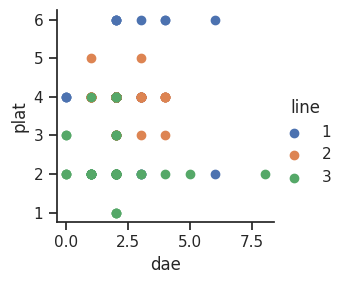

In [211]:
# FacetGrid 생성 및 설정
sns.FacetGrid(df, hue="line") \
   .map(plt.scatter, "dae", "plat") \
   .add_legend()                        # 범례 추가
